In [1]:
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point, Polygon

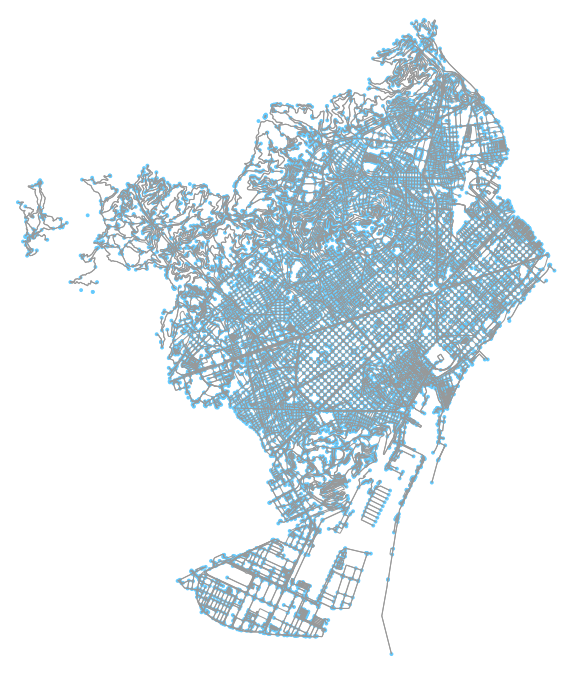

(<Figure size 720x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x122fb3828>)

In [2]:
G=ox.graph_from_place('Barcelona, Spain', network_type='bike', retain_all=True)
ox.plot_graph(G, fig_height=15, fig_width=10)

In [3]:
city_nodes, city_edges = ox.graph_to_gdfs(G)
print(city_nodes.shape)
print(city_edges.shape)

(18099, 6)
(37450, 20)


In [4]:
city_nodes.head()

,y,x,osmid,highway,ref,geometry
21638832,41.363537,2.183085,21638832,turning_circle,NaN,POINT (2.18309 41.36354)
21638843,41.370365,2.187593,21638843,NaN,NaN,POINT (2.18759 41.37036)
21638845,41.370095,2.187758,21638845,NaN,NaN,POINT (2.18776 41.37009)
21638855,41.374983,2.188831,21638855,NaN,NaN,POINT (2.18883 41.37498)
21638859,41.376347,2.188693,21638859,NaN,NaN,POINT (2.18869 41.37635)


In [5]:
city_edges.head()

,u,v,key,osmid,name,highway,oneway,length,geometry,maxspeed,access,service,lanes,ref,width,tunnel,est_width,bridge,junction,area
0,21638832,1259351831,0,23430836,Passeig de l'Escullera,service,False,218.209,"LINESTRING (2.18309 41.36354, 2.18300 41.36347...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21638843,4931844334,0,502812532,NaN,service,False,9.721,"LINESTRING (2.18759 41.37036, 2.18748 41.37038)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21638843,21638845,0,4079500,Passeig de Joan de Borbó,residential,False,33.171,"LINESTRING (2.18759 41.37036, 2.18763 41.37028...",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21638843,1404092135,0,"[543357596, 423227070]",Passeig de Joan de Borbó,residential,False,244.776,"LINESTRING (2.18759 41.37036, 2.18761 41.37054...",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21638845,885308258,0,554707785,Passeig de Joan de Borbó,residential,False,28.718,"LINESTRING (2.18776 41.37009, 2.18771 41.36984)",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Transformation CRS

In [21]:
city_edges=city_edges.to_crs("EPSG:3043")

In [22]:
city_edges.crs

'EPSG:3043'

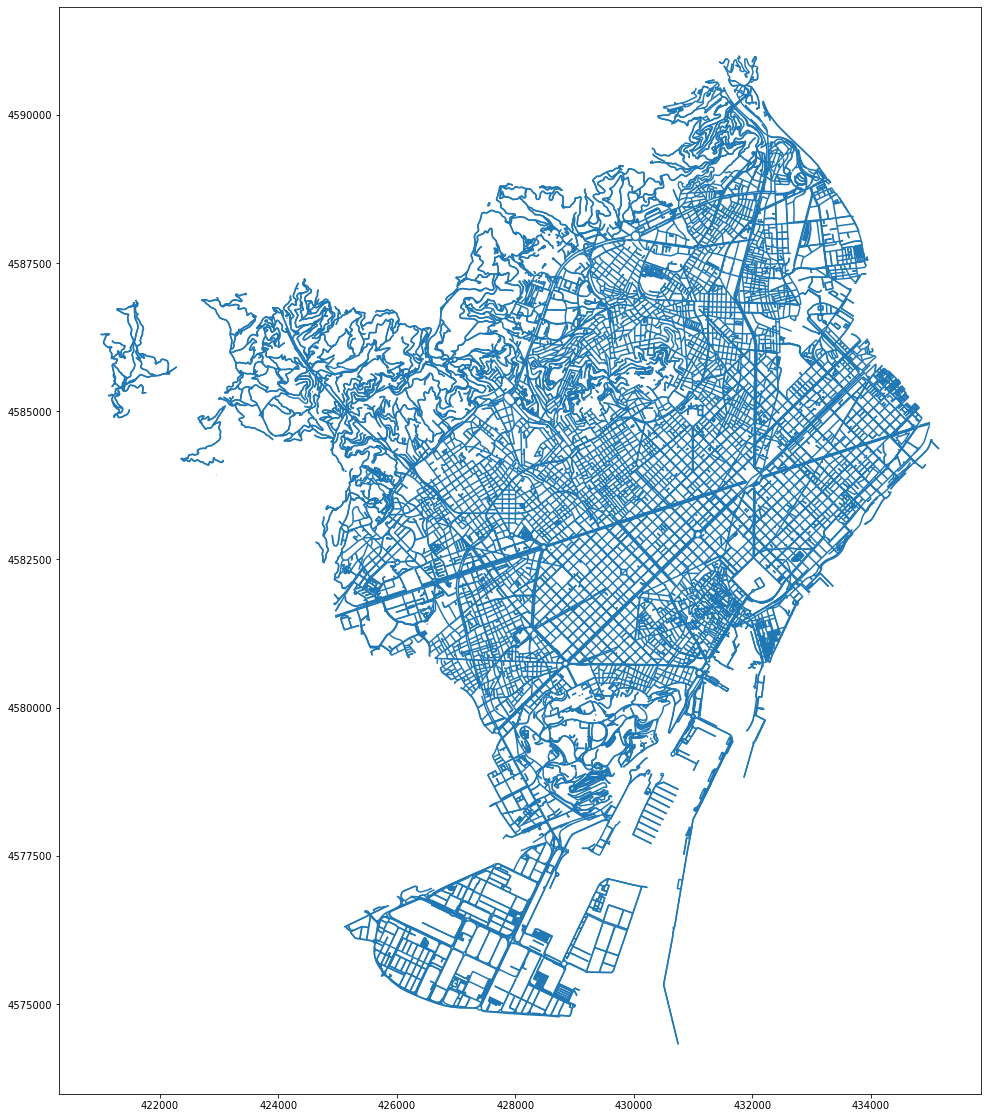

In [23]:
city_edges.geometry.plot(figsize=(20,20))

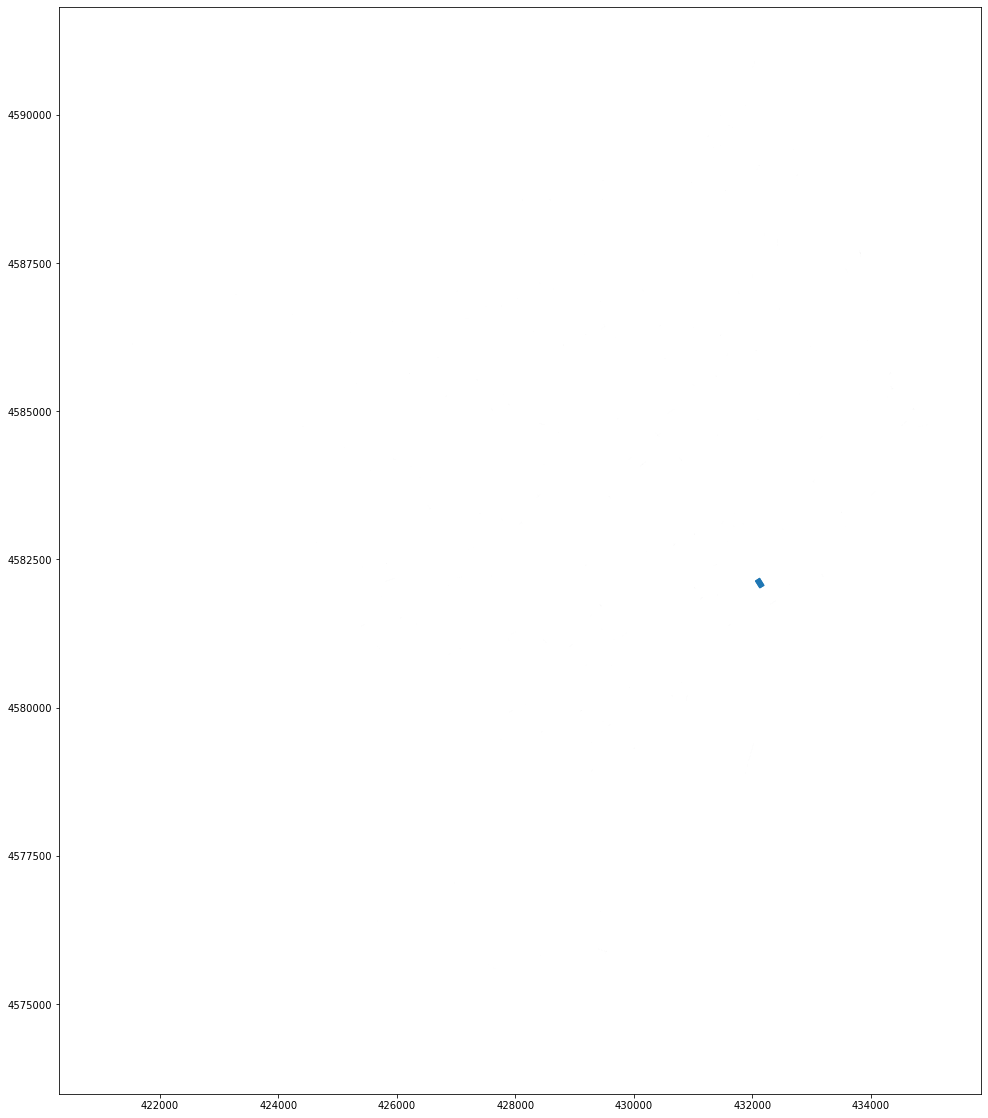

In [31]:
city_edges['geometry'].buffer(0.00005).plot(figsize=(20,20));

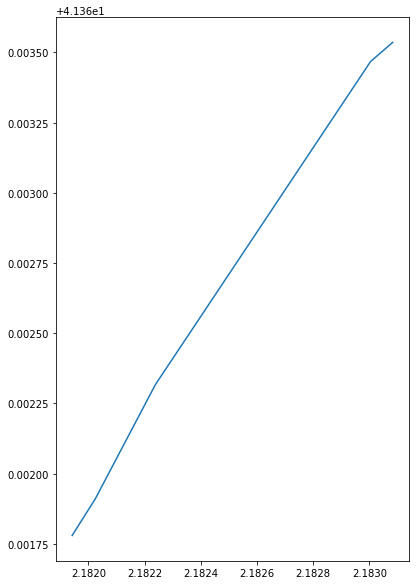

In [8]:
city_edges['geometry'][0:1].plot(figsize=(10, 10));

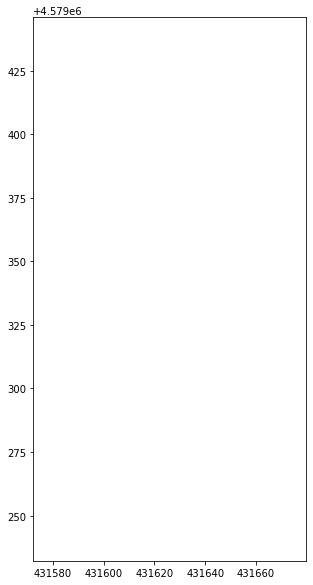

In [36]:
city_edges['geometry'][0:1].buffer(0.00005).plot(figsize=(10, 10))

In [37]:
city_edges['buffer_geometry']=city_edges['geometry'].buffer(0.00005)

In [38]:
city_edges.head()

,u,v,key,osmid,name,highway,oneway,length,geometry,maxspeed,...,service,lanes,ref,width,tunnel,est_width,bridge,junction,area,buffer_geometry
0,21638832,1259351831,0,23430836,Passeig de l'Escullera,service,False,218.209,"LINESTRING (431674.786 4579436.312, 431667.972...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((431667.972 4579428.671, 431602.666 4..."
1,21638843,4931844334,0,502812532,NaN,service,False,9.721,"LINESTRING (432058.933 4580190.744, 432049.286...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((432049.286 4580192.100, 432049.286 4..."
2,21638843,21638845,0,4079500,Passeig de Joan de Borbó,residential,False,33.171,"LINESTRING (432058.933 4580190.744, 432061.676...",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((432061.676 4580181.825, 432063.917 4..."
3,21638843,1404092135,0,"[543357596, 423227070]",Passeig de Joan de Borbó,residential,False,244.776,"LINESTRING (432058.933 4580190.744, 432060.729...",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((432060.729 4580210.124, 432060.729 4..."
4,21638845,885308258,0,554707785,Passeig de Joan de Borbó,residential,False,28.718,"LINESTRING (432072.468 4580160.618, 432067.928...",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((432067.928 4580132.304, 432067.928 4..."


In [39]:
city_edges.isna().sum()

u                      0
v                      0
key                    0
osmid                  0
name                9101
highway                0
oneway                 0
length                 0
geometry               0
maxspeed           16721
access             35624
service            35739
lanes              25860
ref                36954
width              32576
tunnel             36973
est_width          36909
bridge             37215
junction           36942
area               37412
buffer_geometry        0
dtype: int64

In [43]:
city_edges.shape[0]

37450

In [49]:
new_code=[]
for i in range(1, city_edges.shape[0]+1):
    new_code.append(i)
len(new_code)

37450

In [57]:
city_edges['new_code']=new_code

In [59]:
city_edges.head(1)

,u,v,key,osmid,name,highway,oneway,length,geometry,maxspeed,...,lanes,ref,width,tunnel,est_width,bridge,junction,area,buffer_geometry,new_code
0,21638832,1259351831,0,23430836,Passeig de l'Escullera,service,False,218.209,"LINESTRING (431674.786 4579436.312, 431667.972...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((431667.972 4579428.671, 431602.666 4...",1


In [97]:
city_edges=city_edges[['new_code', 'buffer_geometry']]

In [104]:
city_edges = city_edges.rename(columns={'buffer_geometry': 'geometry'})
city_edges

,new_code,geometry
0,1,"POLYGON ((431667.972 4579428.671, 431602.666 4..."
1,2,"POLYGON ((432049.286 4580192.100, 432049.286 4..."
2,3,"POLYGON ((432061.676 4580181.825, 432063.917 4..."
3,4,"POLYGON ((432060.729 4580210.124, 432060.729 4..."
4,5,"POLYGON ((432067.928 4580132.304, 432067.928 4..."
...,...,...
37445,37446,"POLYGON ((430590.527 4581200.768, 430590.527 4..."
37446,37447,"POLYGON ((431385.862 4585119.820, 431385.862 4..."
37447,37448,"POLYGON ((431377.096 4585100.651, 431377.096 4..."
37448,37449,"POLYGON ((429853.656 4584139.218, 429954.448 4..."


In [105]:
city_edges=gpd.GeoDataFrame(city_edges)

In [106]:
city_ = city_edges.dissolve(by='new_code')

In [109]:
city_

,geometry
new_code,
1,"POLYGON ((431667.972 4579428.671, 431602.666 4..."
2,"POLYGON ((432049.286 4580192.100, 432049.286 4..."
3,"POLYGON ((432061.676 4580181.825, 432063.917 4..."
4,"POLYGON ((432060.729 4580210.124, 432060.729 4..."
5,"POLYGON ((432067.928 4580132.304, 432067.928 4..."
...,...
37446,"POLYGON ((430590.527 4581200.768, 430590.527 4..."
37447,"POLYGON ((431385.862 4585119.820, 431385.862 4..."
37448,"POLYGON ((431377.096 4585100.651, 431377.096 4..."


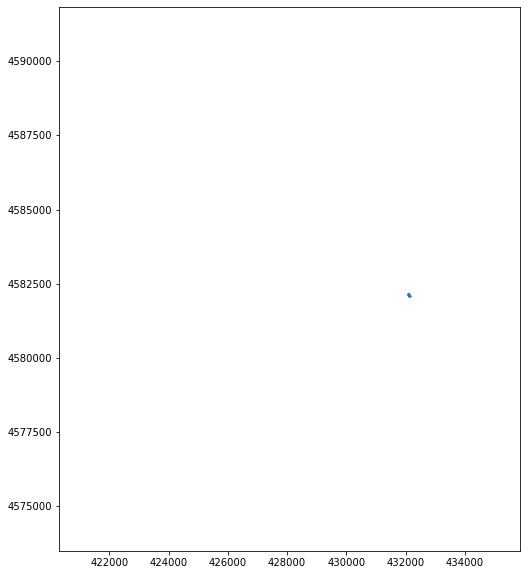

In [110]:
city_.plot(figsize=(10,10))

In [81]:
5/1.11

4.504504504504504

In [92]:
4.50*0.00001

4.5e-05

In [112]:
#city_['geometry'].buffer(4.5e-05).plot(figsize=(20,20))

In [ ]:
#city_['buffer_geometry']=city_['geometry'].buffer(0.00005)

In [13]:
trees=pd.read_csv('Trees_Eng.csv').drop('Unnamed: 0',axis=1)
trees.head()

,Code,X_Coordinates,Y_Coordinates,LAT,LONG,Type,Green_Space,Address,Height,Species_ID,...,Tree_Categoy,Wide_Sidewalk,Data_Plantation,Water_Type,Irrigation_Type,Superficie_Type,Support_Type,Coverage_of_gangway,Size_of_gangway,Edge_of_Gangway
0,0000022AR,430319.118,4587765.810,41.438442,2.165919,ARBRE VIARI,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 468",NaN,1104,...,NaN,NaN,NaN,NaN,MÀNEGA,GESPA,PARTERRE,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA
1,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,PRIMERA,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES
2,0000028AR,430277.559,4587643.344,41.437335,2.165436,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,PRIMERA,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES
3,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,SEGONA,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA
4,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,SEGONA,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA


In [14]:
trees['geometry']=gpd.GeoDataFrame({'geometry':trees[["LAT", "LONG"]].apply(lambda x: Point(x["LONG"], x["LAT"]), axis=1)})
trees

,Code,X_Coordinates,Y_Coordinates,LAT,LONG,Type,Green_Space,Address,Height,Species_ID,...,Wide_Sidewalk,Data_Plantation,Water_Type,Irrigation_Type,Superficie_Type,Support_Type,Coverage_of_gangway,Size_of_gangway,Edge_of_Gangway,geometry
0,0000022AR,430319.118,4587765.810,41.438442,2.165919,ARBRE VIARI,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 468",NaN,1104,...,NaN,NaN,NaN,MÀNEGA,GESPA,PARTERRE,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA,POINT (2.1659192 41.4384419)
1,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES,POINT (2.1653528 41.43728660000001)
2,0000028AR,430277.559,4587643.344,41.437335,2.165436,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES,POINT (2.165436 41.4373353)
3,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA,POINT (2.1625299 41.437769)
4,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA,POINT (2.1625008 41.4377883)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157314,0321082AR,429124.229,4582908.634,41.394591,2.152187,ARBRE VIARI,"Diagonal, Av. (Francesc Macià Pl. - Cinc d'Oro...","Av Diagonal, 431",MITJANA,126,...,NaN,NaN,NaN,SENSE INFORMAR,SAULÓ AMB VEGETACIÓ,PARTERRE,NaN,NaN,NaN,POINT (2.152187 41.3945907)
157315,0321083AR,429140.163,4582913.915,41.394640,2.152377,ARBRE VIARI,"Diagonal, Av. (Francesc Macià Pl. - Cinc d'Oro...","Av Diagonal, 427",MITJANA,126,...,NaN,NaN,NaN,SENSE INFORMAR,SAULÓ AMB VEGETACIÓ,PARTERRE,NaN,NaN,NaN,POINT (2.152377 41.39463970000001)
157316,0321088AR,431827.363,4582320.392,41.389526,2.184585,ARBRE VIARI,Pg. Pujades (Wellington - Pg. Picaso),"Pg Pujades, 12",PETITA,126,...,NaN,16/12/2019,NaN,SENSE INFORMAR,NaN,NaN,NaN,NaN,NaN,POINT (2.1845848 41.3895263)
157317,0321089AR,429218.868,4584138.289,41.405674,2.153175,ARBRE VIARI,NaN,", 189",NaN,5073868,...,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL RECTANGULAR,NaN,NaN,NaN,POINT (2.1531752 41.40567410000001)


In [15]:
type(city_edges)

geopandas.geodataframe.GeoDataFrame

In [16]:
type(trees)

pandas.core.frame.DataFrame

In [17]:
trees_points=gpd.GeoDataFrame(trees)

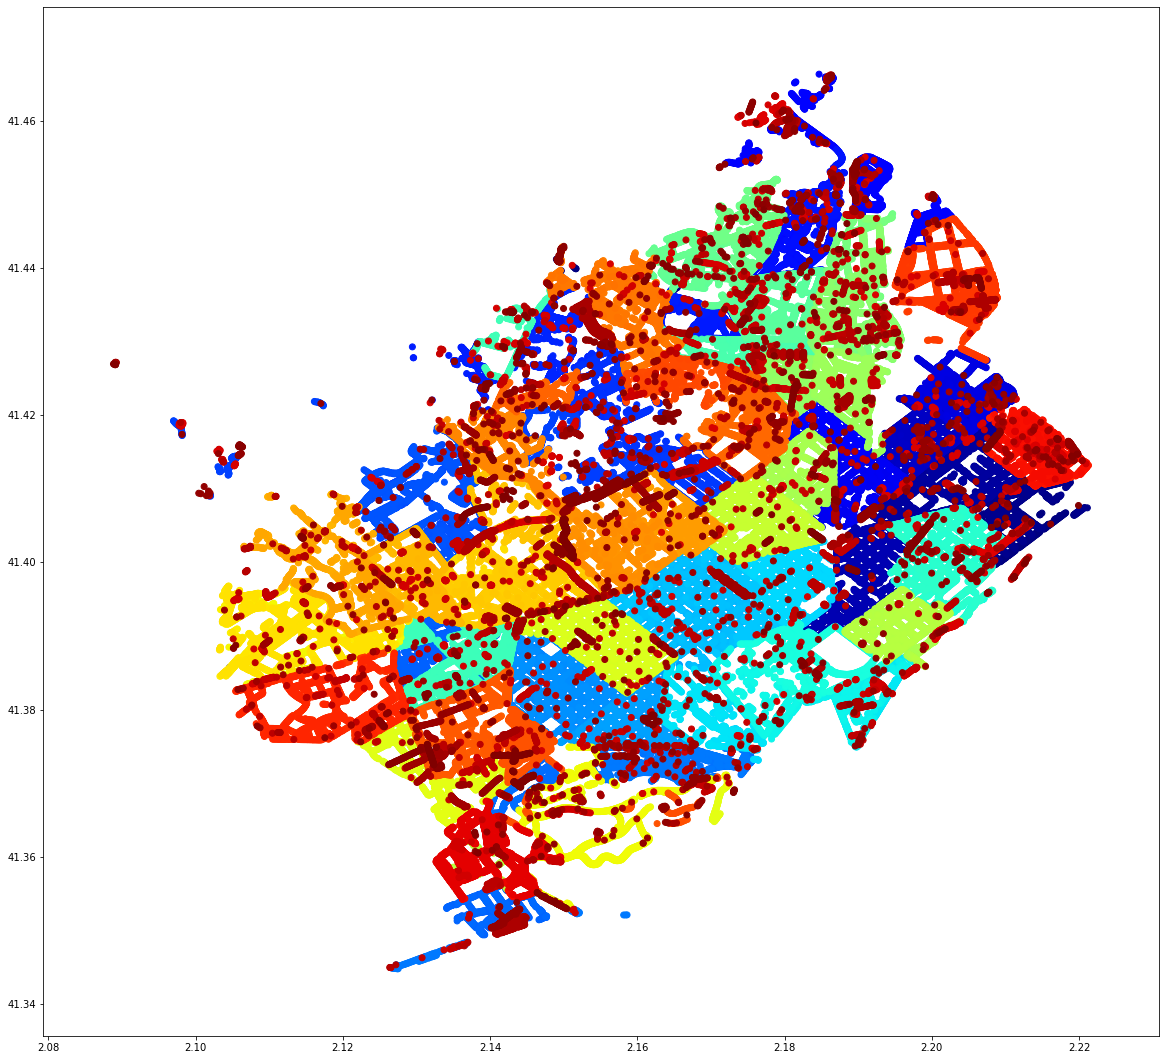

In [18]:
trees_points.plot(figsize=(20,20), column='Code', cmap='jet');

In [19]:
type(trees_points)

geopandas.geodataframe.GeoDataFrame

In [107]:
#street=[]
#street_name=[]
#trees_perstreet=[]

#for i in range(trees_points.shape[0]):
#    count=0
    #for x in range(city_edges.shape[0]):
        #if trees_points.geometry[i].within(city_edges.buffer_geometry[x])==True:
            #count+=1
        #else:
            #pass
#    street.append(city_edges.buffer_geometry[x])
#    street_name.append(city_edges.name[x])
    #trees_perstreet.append(count)

In [108]:
#joined_df = gpd.overlay(city_edges, trees_points, how='intersection')


#joined_df.plot(alpha=0.5, edgecolor='k', cmap='tab10');